## Importing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import networkx as nx
import csv, sys

%matplotlib inline

## Network Setup

Network has 30 nodes
Network has 34 edges
Finding SP from 12 to 1


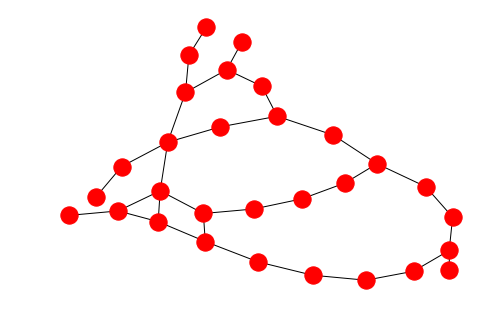

In [2]:
G=nx.Graph()
G.add_nodes_from(list(range(1,30)))
G.add_edges_from([(1,2),(1,29), (1, 23), (1, 26)])
G.add_edge(30, 29)
G.add_edges_from([(21,23),(21,22), (21, 20)])
G.add_edges_from([(28,27),(27,26), (26, 24), (24, 25), (22, 24)])
G.add_edges_from([(5,3),(5,2), (5, 6)])
G.add_edges_from([(4,3),(3,2),(2, 19),(19,18),(18,17),(17,16),(16,15),(15,20)])
G.add_edges_from([(19,6),(6,7),(7, 8),(8,9),(9,10),(10,11),(11,12),(11,13),(13,14),(14,15)])

nodes = len(G.nodes())
edges = len(G.edges())
print("Network has {} nodes".format(nodes))
print("Network has {} edges".format(edges))

source = 12
target = 1
print("Finding SP from {} to {}".format(source, target))

nx.draw(G)
plt.show()

## Generating Data

### Randomizing Input Weights

In [60]:
gigabit_max_packet_size = 1518 + 12 + 8 # Ethernet Frame + Interframe Gap + Preamble
gigabit_max_throughput = 125 * 1e6 # 1000 MB/s
gigabit_min_throughput = 1e2       # 100 bytes/s
f_min = gigabit_max_packet_size / gigabit_max_throughput
f_max = gigabit_max_packet_size / gigabit_min_throughput

print('Max througtput: ' + str(gigabit_max_throughput))
print('Min througtput: ' + str(gigabit_min_throughput))
print('f max: ' + str(f_max))
print('f min: ' + str(f_min))

def generate_example_inputs(G):
    throughputs = []
    for edge in G.edges():
        i, j = edge
        throughput = np.random.uniform(gigabit_min_throughput, gigabit_max_throughput)
        G[i][j]['weight'] = gigabit_max_packet_size / throughput
        weights.append(G[i][j]['weight'])
    return throughput



Max througtput: 125000000.0
Min througtput: 100.0
f max: 15.38
f min: 1.2304e-05


### Calculating Correct Path Output

In [136]:
def route_to_vec(route):
    path_vector = [0] * edges
    for i in route:
        path_vector[i-1] = 1
    return path_vector

def generate_example_output(G):
    dijkstra = nx.bidirectional_dijkstra(G, source=source, target=target)
    path_list = dijkstra[1]
    path_vector = route_to_vec(path_list)
    return path_vector

In [195]:
def generate_example():
    x = generate_example_inputs(G)
    y = generate_example_output(G)
    return x,y

m = 1000000
print("Generating {} examples".format(m))

data = []
labels = []

for i in range(m):
    x, y = generate_example()
    data.append(x)
    labels.append(y)

Generating 1000000 examples


### Dataset alanysis

All possible routes from 12 to 1
Route 0 => [12, 11, 10, 9, 8, 7, 6, 19, 2, 1]
Route 1 => [12, 11, 10, 9, 8, 7, 6, 19, 18, 17, 16, 15, 20, 21, 22, 24, 26, 1]
Route 2 => [12, 11, 10, 9, 8, 7, 6, 19, 18, 17, 16, 15, 20, 21, 23, 1]
Route 3 => [12, 11, 10, 9, 8, 7, 6, 5, 2, 19, 18, 17, 16, 15, 20, 21, 22, 24, 26, 1]
Route 4 => [12, 11, 10, 9, 8, 7, 6, 5, 2, 19, 18, 17, 16, 15, 20, 21, 23, 1]
Route 5 => [12, 11, 10, 9, 8, 7, 6, 5, 2, 1]
Route 6 => [12, 11, 10, 9, 8, 7, 6, 5, 3, 2, 19, 18, 17, 16, 15, 20, 21, 22, 24, 26, 1]
Route 7 => [12, 11, 10, 9, 8, 7, 6, 5, 3, 2, 19, 18, 17, 16, 15, 20, 21, 23, 1]
Route 8 => [12, 11, 10, 9, 8, 7, 6, 5, 3, 2, 1]
Route 9 => [12, 11, 13, 14, 15, 16, 17, 18, 19, 2, 1]
Route 10 => [12, 11, 13, 14, 15, 16, 17, 18, 19, 6, 5, 2, 1]
Route 11 => [12, 11, 13, 14, 15, 16, 17, 18, 19, 6, 5, 3, 2, 1]
Route 12 => [12, 11, 13, 14, 15, 20, 21, 22, 24, 26, 1]
Route 13 => [12, 11, 13, 14, 15, 20, 21, 23, 1]
Route 0 has 188587 examples in dataset
Route 1 has 721 examples i

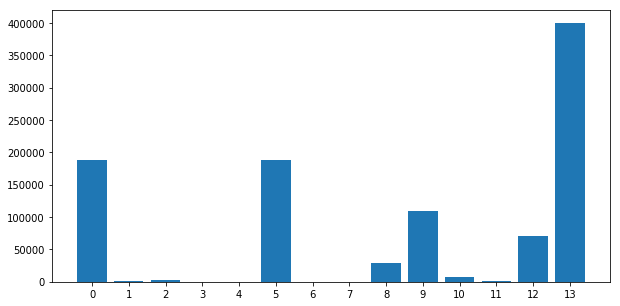

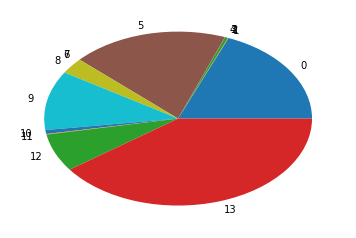

In [194]:
unique_routes = list(nx.all_simple_paths(G, source=source, target=target))
unique_route_vecs = dict()
for r in range(len(unique_routes)):
    route = unique_routes[r]
    route_vec = tuple(route_to_vec(route))
    unique_route_vecs[route_vec] = r
    
print("All possible routes from {} to {}".format(source, target))
for r in range(len(unique_route_vecs)):
    print("Route {} => {}".format(r, list(unique_routes)[r]))
    
route_ids = []
route_counts = [0] * len(unique_routes)
for i in range(m):
    l = tuple(labels[i])
    r_id = unique_route_vecs[l]
    route_ids.append(r_id)    
    route_counts[r_id] += 1
            
for i in range(len(unique_routes)):
    print("Route {} has {} examples in dataset".format(i, route_counts[i]))
    
fig, ax = plt.subplots()
bins = list(range(0, 14))
plt.bar(bins, route_counts)
ax.set_xticks([i for i in bins])
ax.set_xticklabels(('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13'))
fig.set_size_inches(10,5)
plt.show()

plt.pie(route_counts, labels=bins)
plt.show()

### Save Dataset to CSV

In [ ]:
with open('some.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    for i in range(m):
        example = data[i] + labels[i]
        writer.writerow(example)

In [3]:
for edge in G.edges():
    print(edge)

(1, 2)
(1, 26)
(1, 29)
(1, 23)
(2, 19)
(2, 3)
(2, 5)
(3, 4)
(3, 5)
(5, 6)
(6, 19)
(6, 7)
(7, 8)
(8, 9)
(9, 10)
(10, 11)
(11, 12)
(11, 13)
(13, 14)
(14, 15)
(15, 16)
(15, 20)
(16, 17)
(17, 18)
(18, 19)
(20, 21)
(21, 22)
(21, 23)
(22, 24)
(24, 25)
(24, 26)
(26, 27)
(27, 28)
(29, 30)
